# Social Media Analysis Project

In the era of digital communication, social media platforms have become indispensable sources of information and interaction. This project delves into data analysis by harnessing the power of Python to explore and derive insights from randomly generated social media data. The dataset comprises critical parameters such as category, date posted, and the number of likes, providing a rich source of information for uncovering patterns, trends, and user engagement dynamics. digital landscape.

Objectives:

Exploratory Data Analysis: Conduct a thorough exploration of the dataset to understand its structure, identify outliers, and reveal potential relationships between different variables.

Temporal Patterns: Investigate the material aspect of social media activity by analyzing the distribution of posts over time. This includes detecting peak posting hours, daily trends, and recurring patterns.

Category-based Insights: Uncover patterns within specific categories to better understand user preferences, content popularity, and engagement levels across various themes.

Likes Analysis: Examine the factors influencing the number of likes received by posts. This could involve identifying content characteristics that resonate more with the audience and understanding the correlation between post frequency and engagement.

Methodology:

The project employs Python as the primary programming language, utilizing popular libraries such as Pandas, NumPy, and Matplotlib for data manipulation, analysis, and visualization. The data will be preprocessed to ensure cleanliness and relevance before applying statistical and machine-learning techniques to extract meaningful insights.

Significance:

Understanding social media dynamics through data analysis has wide-ranging applications, including content optimization, targeted marketing strategies, and enhanced user experience. This project aims to contribute valuable insights to the broader social media analytics field, showcasing Python's potential in unraveling patterns within vast and diverse datasets.

As we embark on this journey, we aim to unravel the mysteries of social media engagement and provide a foundation for informed decision-making in the digital landscape.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Generating Random Data

The random module will allow for the creation of random social media data, with the help of lists and dictonaries.

In [48]:
Categories = ['Food', 'Entertainment', 'Music', 'Technology', 'Fitness', 'Travel', 'Fashion']

df = pd.DataFrame({'Date': pd.date_range('2022-01-01', periods = 400, freq = 'D'),
      'Category': [random.choice(Categories) for _ in range(400)],
      'Likes': np.random.randint(0, 20000, size = 400)})

print(df)

          Date       Category  Likes
0   2022-01-01        Fitness  10106
1   2022-01-02         Travel   7657
2   2022-01-03           Food  18850
3   2022-01-04           Food  14551
4   2022-01-05          Music   7906
..         ...            ...    ...
395 2023-01-31  Entertainment   6638
396 2023-02-01          Music   6570
397 2023-02-02         Travel   3249
398 2023-02-03        Fitness   9110
399 2023-02-04         Travel   7595

[400 rows x 3 columns]


# Data Overview

This section will involve looking over the data to view the scope of the randomly generated information.

In [49]:
df.head(20)

,Date,Category,Likes
0,2022-01-01,Fitness,10106
1,2022-01-02,Travel,7657
2,2022-01-03,Food,18850
3,2022-01-04,Food,14551
4,2022-01-05,Music,7906
5,2022-01-06,Travel,7287
6,2022-01-07,Food,892
7,2022-01-08,Technology,10222
8,2022-01-09,Travel,4675
9,2022-01-10,Travel,1933


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      400 non-null    datetime64[ns]
 1   Category  400 non-null    object        
 2   Likes     400 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 7.9+ KB


In [51]:
df.describe()

,Date,Likes
count,400,400.000000
mean,2022-07-19 12:00:00,10082.505000
min,2022-01-01 00:00:00,13.000000
25%,2022-04-10 18:00:00,4787.500000
50%,2022-07-19 12:00:00,10230.000000
75%,2022-10-27 06:00:00,15522.750000
max,2023-02-04 00:00:00,19994.000000
std,NaN,5993.350144


In [52]:
# Counting each category element
category_counts = df['Category'].value_counts()
print("Count of each 'Category' element: ")
print(category_counts)

Count of each 'Category' element: 
Category
Travel           66
Technology       65
Music            59
Food             58
Fitness          55
Fashion          54
Entertainment    43
Name: count, dtype: int64


# Data Cleaning

Here I will be checking for null values and duplicates, along with converting categories to different datatypes, to ensure data integrity.

In [53]:
df.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

No null values present!

In [54]:
duplicates = df[df.duplicated()]
print("Duplicate Rows: ")
print(duplicates)

Duplicate Rows: 
Empty DataFrame
Columns: [Date, Category, Likes]
Index: []


No duplicate values present!

In [55]:
# Converting Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      400 non-null    datetime64[ns]
 1   Category  400 non-null    object        
 2   Likes     400 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 7.9+ KB
None


In [56]:
# Converting Likes column to integer
df['Likes'] = df['Likes'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      400 non-null    datetime64[ns]
 1   Category  400 non-null    object        
 2   Likes     400 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 7.9+ KB
None


# Analysis of Data

This segment will center its attention on discerning patterns and trends inherent in the dataset.

In [57]:
# Total number of likes across all categories
sum_likes = df['Likes'].sum()
print("Total number of likes:", sum_likes)

Total number of likes: 4033002


In [58]:
# Average likes per post
avg_likes_per_post = df['Likes'].mean()
print("Average likes per post:", avg_likes_per_post)

Average likes per post: 10082.505


The average number of likes per post is just over 10,000. Although that is not bad, some could argue that being barely above 10,000 likes on average isn't effective at reaching the target audience.

Total likes per category: 
Category
Fashion          666945
Travel           635876
Music            629068
Technology       623921
Food             559814
Fitness          552960
Entertainment    364418
Name: Likes, dtype: int32


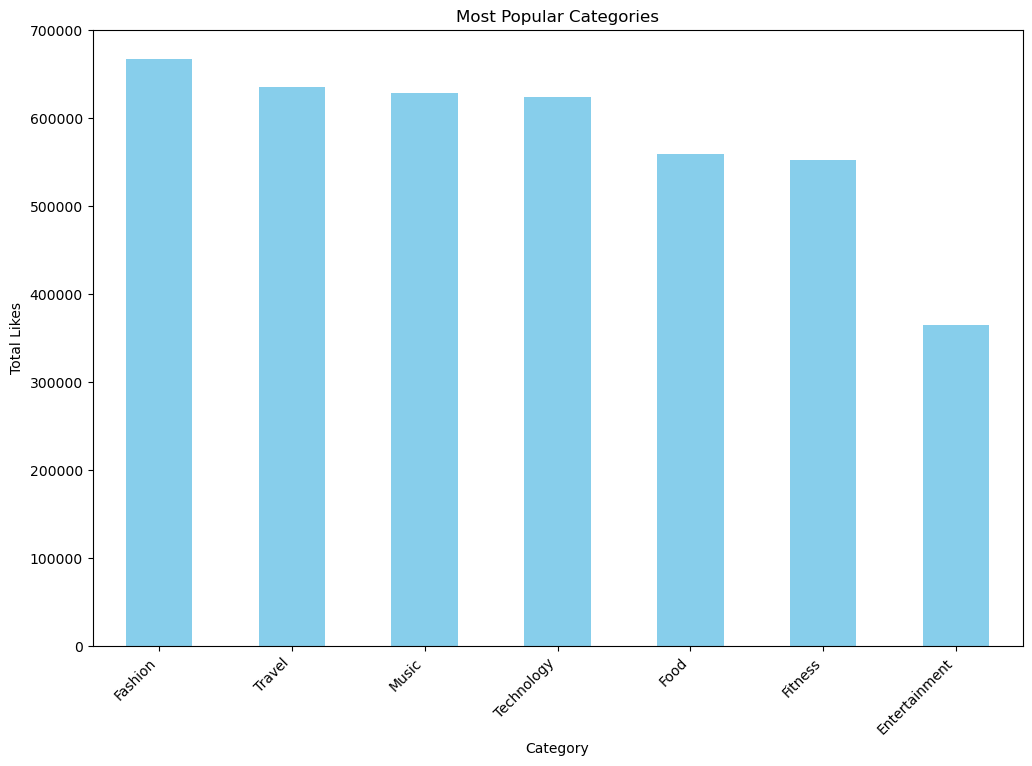

In [59]:
# Total number of likes per category(Most Popular)
total_likes_per_category = df.groupby('Category')['Likes'].sum()
total_likes_per_category = total_likes_per_category.sort_values(ascending = False)
print("Total likes per category: ")
print(total_likes_per_category)

# Plotting the data
plt.figure(figsize=(12, 8))
total_likes_per_category.plot(kind='bar', color='skyblue')
plt.title('Most Popular Categories')
plt.xlabel('Category')
plt.ylabel('Total Likes')
plt.xticks(rotation=45, ha='right')
plt.show()

Fashion is demonstrated as the top category, with Entertainment in last place. With trends such as "outfit of the day" constantly going viral,
it only makes sense that Fashion is the most popular category.

In [60]:
# Average number of likes per category
avg_likes_category = df.groupby('Category')['Likes'].mean()
avg_likes_category = avg_likes_category.sort_values(ascending = False)
print("Average likes per category: ")
print(avg_likes_category)

Average likes per category: 
Category
Fashion          12350.833333
Music            10662.169492
Fitness          10053.818182
Food              9651.965517
Travel            9634.484848
Technology        9598.784615
Entertainment     8474.837209
Name: Likes, dtype: float64


Although Travel had the second most total likes, the category fell to fifth in average likes. Maybe the post frequency for Travel is not as high as other categories, or maybe some of the posts weren't as engaging as others, which would bring down the average like rate.

Average likes per category: 
Category
Fashion          12350.833333
Music            10662.169492
Fitness          10053.818182
Food              9651.965517
Travel            9634.484848
Technology        9598.784615
Entertainment     8474.837209
Name: Likes, dtype: float64
Average likes per post:  10082.505


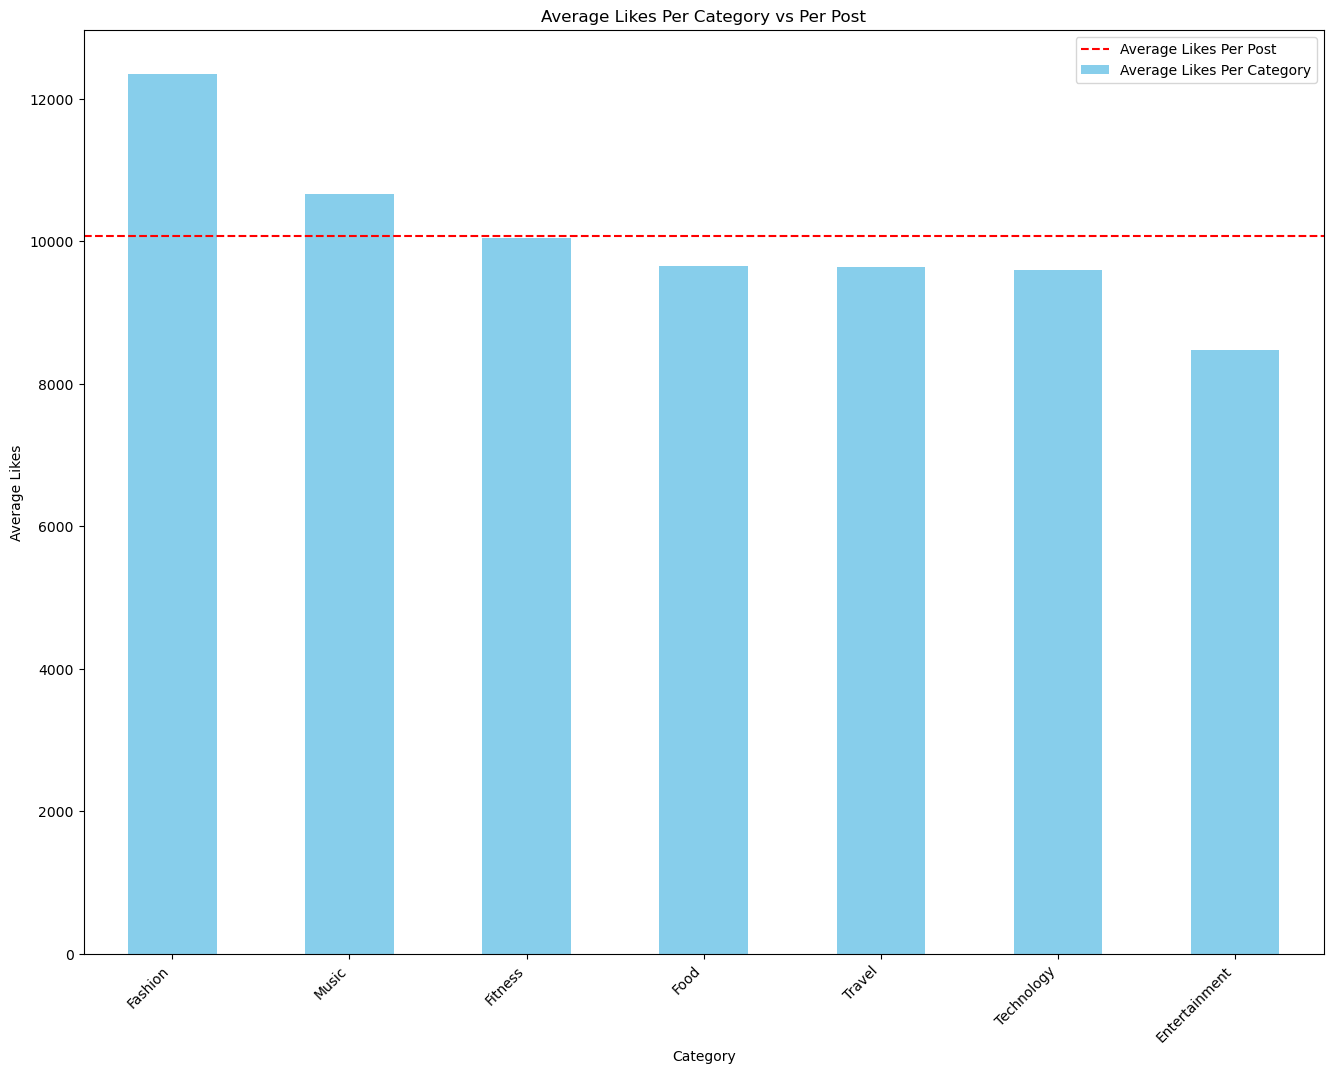

In [61]:
# Creating dual chart to compare average likes per category to average likes overall(per post)
avg_likes_category =  df.groupby('Category')['Likes'].mean()
avg_likes_category = avg_likes_category.sort_values(ascending = False)

# Calculating average likes per post
avg_likes_per_post = df['Likes'].mean()

# Printing the average likes per category and per post
print("Average likes per category: ")
print(avg_likes_category)
print("Average likes per post: ", avg_likes_per_post)

# Plotting the data
plt.figure(figsize = (16, 12))
avg_likes_category.plot(kind = 'bar', color = 'skyblue', label = 'Average Likes Per Category')
plt.axhline(y = avg_likes_per_post, color = 'red', linestyle = '--', label = 'Average Likes Per Post')
plt.title('Average Likes Per Category vs Per Post')
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.xticks(rotation = 45, ha = 'right')
plt.legend()
plt.show()

Interesting! The Fitness category was ranked second to last in total popularity, but this chart shows that it is ranked third 
in average likes! Fitness is one category that will always have some sort of following, so Fashion must
have more of an engagement with users, or the quailty of the posts must be outstanding. 
The red line represents the average amount of likes across all categories.

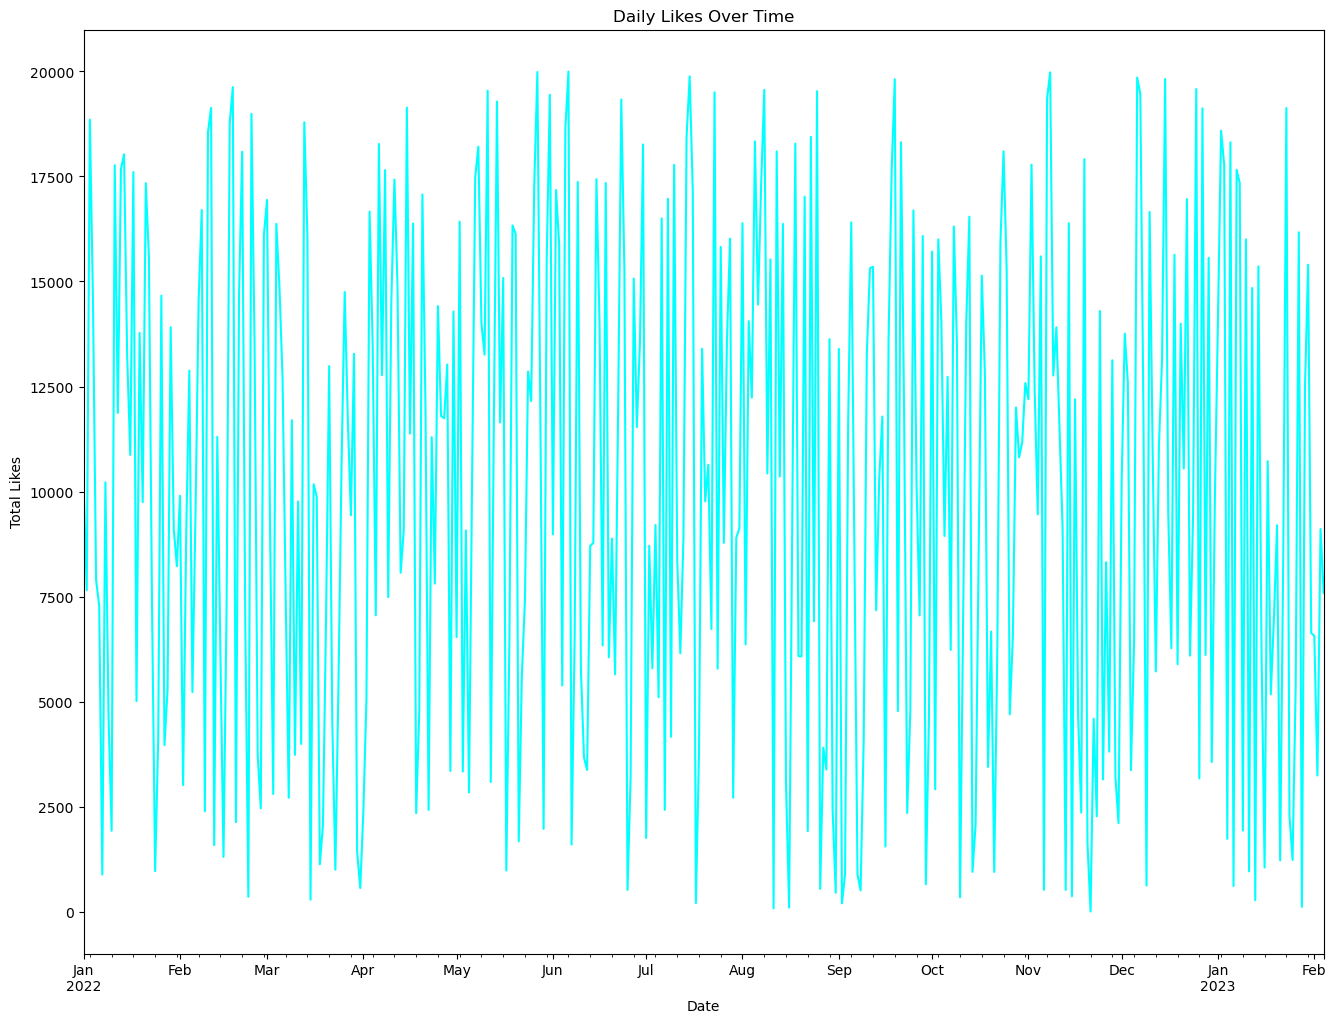

In [62]:
# Daily Likes Time Series
daily_likes = df.groupby('Date')['Likes'].sum()

plt.figure(figsize = (16, 12))
daily_likes.plot(color = 'cyan')
plt.title('Daily Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.show()

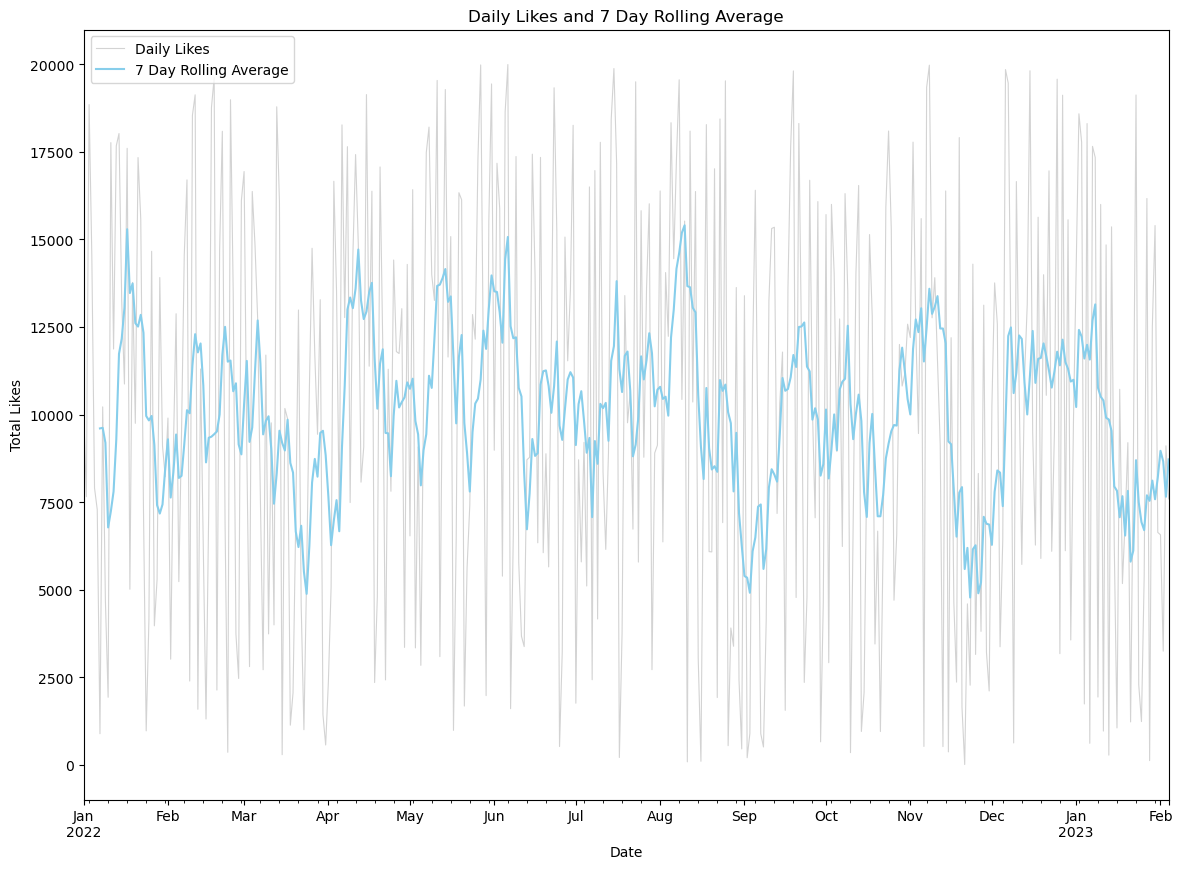

In [63]:
# Rolling Average Calculation

# Set 'Date' as the index in a new DataFrame
df_indexed = df.set_index('Date')

# Calculate the rolling average
rolling_avg = df_indexed['Likes'].rolling(window=7).mean()

# Plotting the data
plt.figure(figsize=(14, 10))
df_indexed['Likes'].plot(label='Daily Likes', color='lightgray', linestyle='-', linewidth=0.8)
rolling_avg.plot(label='7 Day Rolling Average', color='skyblue')
plt.title('Daily Likes and 7 Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.legend()
plt.show()


This chart visualizes the engagement dynamics on our social media platform over time. The light gray line represents the total number of likes we received daily. Each point on the line corresponds to a specific date, showing the day-to-day variations in engagement. s.

The sky blue line, labeled '7 Day Rolling Average,' is a smoothed trendline. It represents the average number of likes over a rolling 7-day period. This line helps to highlight broader trends by reducing the impact of daily fluctuations.


Comparing the two lines, we can discern patterns and spot anomalies more easily. For instance, if the 'Daily Likes' line has sudden spikes, but the '7 Day Rolling Average' line remains steady, it might imply temporary boosts in engagement that even out over time.

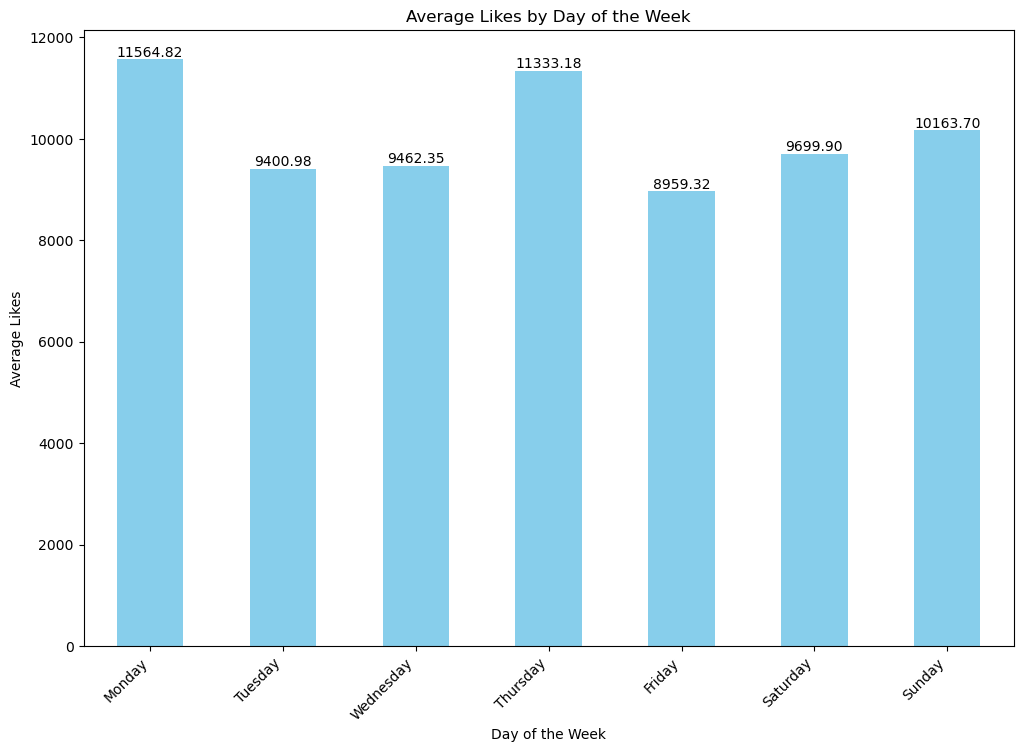

In [64]:
# Engagement by each day of the week

# Create a new DataFrame with 'Date' as the index
df_indexed = df.set_index('Date')

# Extract the day of the week
df_indexed['Day_of_Week'] = df_indexed.index.dayofweek

# Group by 'Day_of_Week' and calculate the average likes for weekdays and weekends
engagement_by_day = df_indexed.groupby('Day_of_Week')['Likes'].mean()

# Plotting the data with data labels
plt.figure(figsize=(12, 8))
bars = engagement_by_day.plot(kind='bar', color='skyblue')

# Add data labels
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.title('Average Likes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45, ha='right')
plt.show()


Interesting. Thursday is the day that receives the most engagement, followed by Monday. Surprisingly, Friday is the least interactive day, which you would think would be the opposite. It could be inferred that weekends are usually spent doing outdoor activities, or anything not requiring the overusage of social media. On the other hand, Mondays could be optimal because people tend to be on social media more during the beginning of the workweek, which can provide a key strategy in audience engagement. Thursdays could be popular due to it being the day before Friday, so people may spend more time preparing for events or posts that normally occur on weekends.

Average likes per hour: 
Hour
0      9986.823529
1      7179.588235
2      8448.058824
3      7602.882353
4     11696.764706
5      9542.529412
6     11490.764706
7     10870.588235
8      9967.647059
9      8670.235294
10    10970.117647
11    12489.941176
12     8152.588235
13     6971.176471
14     8056.117647
15     8947.764706
16    10519.250000
17     9041.187500
18    12508.437500
19    10487.687500
20    14204.187500
21    10869.812500
22    10325.187500
23    11118.250000
Name: Likes, dtype: float64


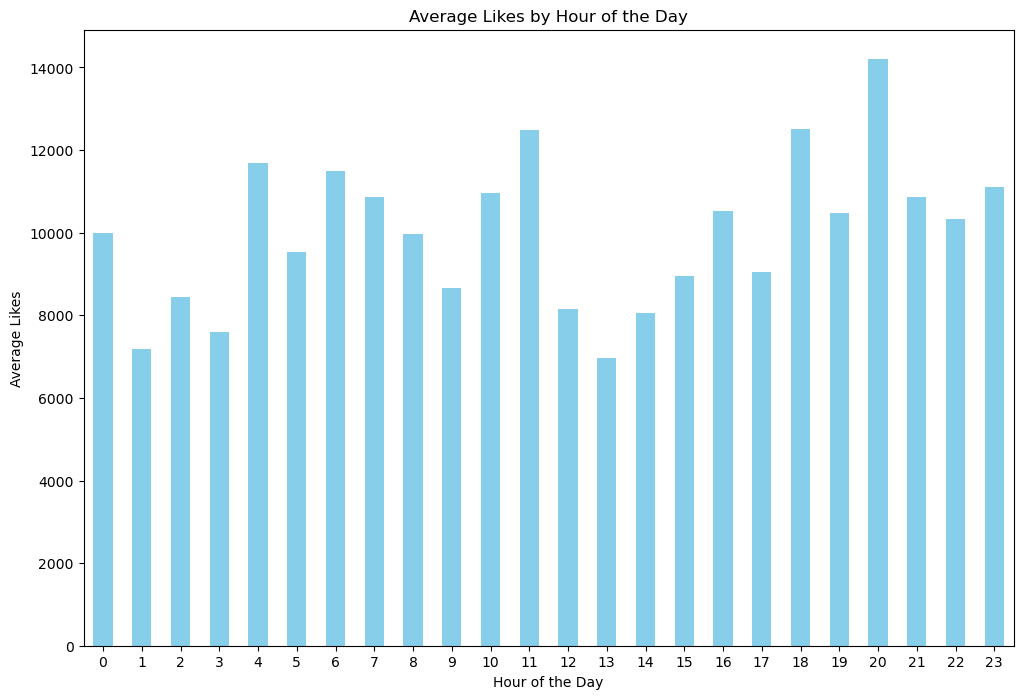

In [65]:
# Calculating Average likes per hour
df = pd.DataFrame({'Date': timestamps, 'Likes': likes})

# Extract the hour of the day from the 'Date' column
df['Hour'] = df['Date'].dt.hour

# Group by 'Hour' and calculate the average likes for each hour
average_likes_by_hour = df.groupby('Hour')['Likes'].mean()
print("Average likes per hour: ")
print(average_likes_by_hour)

# Plotting the data as a bar chart
plt.figure(figsize=(12, 8))
average_likes_by_hour.plot(kind='bar', color='skyblue')
plt.title('Average Likes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Likes')
plt.xticks(rotation=0)
plt.show()


The chart is showing that on average, 7pm-9pm(Hour 18-20) is the most engaging time of day, which could stem from people laying in bed scrolling 
on social media. Companies could use this as an advantage to post specific content at a time where the nightime ritual for most people is to look at 
social media. 

In [67]:
# Engagement Rate
engagement_rate = df['Likes'].sum() / len(df)
print(f'Engagement Rate: {engagement_rate:.2%}')

Engagement Rate: 998231.25%


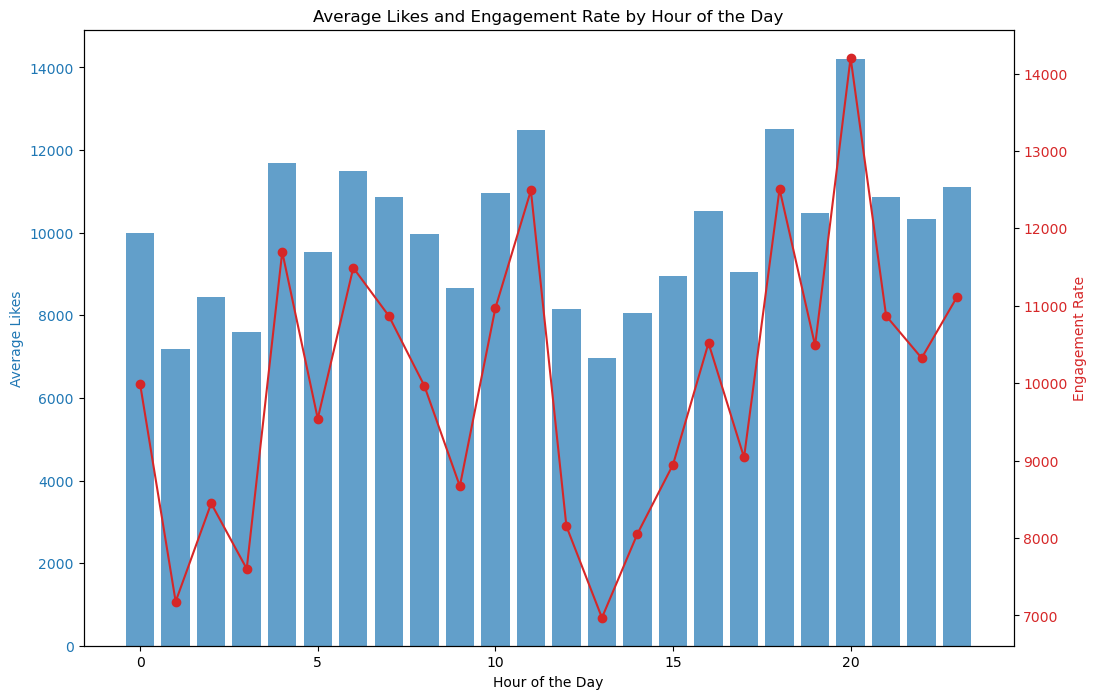

In [68]:
df = pd.DataFrame({'Date': timestamps, 'Likes': likes})

# Extract the hour of the day from the 'Date' column
df['Hour'] = df['Date'].dt.hour

# Group by 'Hour' and calculate the average likes and engagement rate for each hour
hourly_data = df.groupby('Hour')['Likes'].agg(['mean', 'count'])
hourly_data['Engagement Rate'] = hourly_data['mean']

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Likes', color=color)
ax1.bar(hourly_data.index, hourly_data['mean'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Engagement Rate', color=color)
ax2.plot(hourly_data.index, hourly_data['Engagement Rate'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Likes and Engagement Rate by Hour of the Day')
plt.show()


This chart illustrates the average likes and engagement rate per hour of the day based on our social media data. The blue bars represent the average number of likes received during each hour, and the red line with markers corresponds to the engagement rate, which is calculated as the average likes per hour. Essentially, it provides insights into when our audience tends to be more engaged with our content throughout the day. Peaks in the blue bars indicate higher average likes, while the red line shows the overall engagement rate trend.

In [70]:
Categories = ['Food', 'Entertainment', 'Music', 'Technology', 'Fitness', 'Travel', 'Fashion']

df['Category'] = np.random.choice(categories, size=len(df))

print(df.head())

                 Date  Likes  Hour       Category
0 2022-01-01 00:00:00  15795     0        Fitness
1 2022-01-01 01:00:00    860     1  Entertainment
2 2022-01-01 02:00:00   5390     2        Fitness
3 2022-01-01 03:00:00  11964     3           Food
4 2022-01-01 04:00:00  11284     4        Fitness


# Correlations

In [72]:
# Correlation between number of likes and time of day
correlation_likes_hour = df['Likes'].corr(df['Hour'])
print(correlation_likes_hour)

0.10827320907700468


In [73]:
# Correlation between number of likes and day of month
correlation_likes_date = df['Likes'].corr(df['Date'].dt.day)
print(correlation_likes_date)

0.0521147011680996


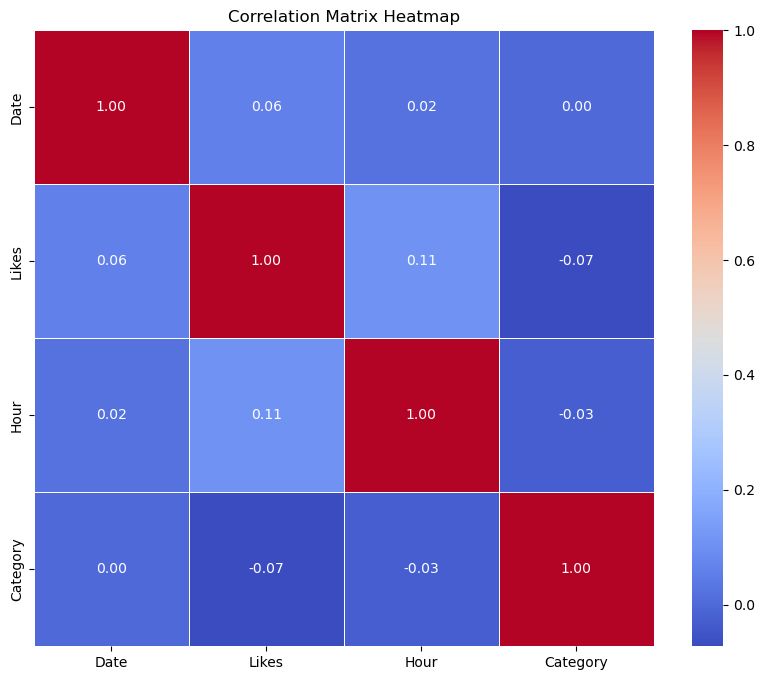

In [78]:
# Create a correlation matrix

# Encode the 'Category' column to numeric values
df['Category'] = df['Category'].astype('category').cat.codes

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [80]:
# Correlation between number of likes and day of the week
df['Day_of_Week'] = df['Date'].dt.dayofweek
correlation_likes_day_of_week = df['Likes'].corr(df['Day_of_Week'])

print(correlation_likes_day_of_week)

-0.01251657752383591


Upon thorough analysis, it has become evident that the randomized data we explored does not exhibit any significant correlation among the variables investigated. Despite variations introduced through randomization, the absence of a discernible pattern or relationship indicates a lack of inherent connections within the dataset.

# Conclusion

In the pursuit of understanding user engagement on our social media platform, our data analysis journey has uncovered compelling insights that shed light on the dynamics of audience interaction. Through a comprehensive examination of key metrics, including 'Likes,' 'Hour of the Day,' and 'Category,' we've derived valuable findings that can inform strategic decisions and enhance our content strategy.ith the audience.

1. Peak Engagement Hours:
We identified distinct patterns in user engagement based on the time of day. Notably, 7pm-9pm emerged as peak engagement periods, suggesting that our audience is more receptive to content during these specific hours. Tailoring posts to align with these time frames may optimize overall engagement.

2. Category Popularity:
Analyzing the popularity of different content categories, we observed that Fashion consistently garnered the highest number of likes. This insight offers a clear direction for content creators, emphasizing the importance of focusing on Fashion to maximize engagement.

3. Day-of-Week Dynamics:
Our investigation into daily engagement patterns revealed that Mondays and Thursdays are the most opportune days. This information provides a nuanced understanding of when our audience is most active, enabling targeted content scheduling for enhanced visibility and impact.

4. Correlations:
The correlation matrix exposed non-existent relationships. Notably, the correlation between suggests future analyses could incorporate additional factors or refine the current ones to further explore the dynamics of the dataset. This could involve introducing real-world variables or adjusting the parameters of randomization to simulate more specific scenarios, offering strategic implications for content planning and audience engagement strategies.

5. Future Considerations:
While our analysis has unearthed valuable insights, it's essential to acknowledge the limitations of our dataset. Future iterations of this project could benefit from additional data points, such as comments, and amount of time spent on social media, to provide a more comprehensive understanding of user behavior.


In conclusion, this data analysis project serves as a foundation for data-driven decision-making. By harnessing the uncovered insights, we can refine our social media approach, tailor content strategies, and ultimately enhance the overall user experience. As we move forward, these findings will guide us in optimizing our content delivery and strengthening our connection with the audience.